In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [5]:
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

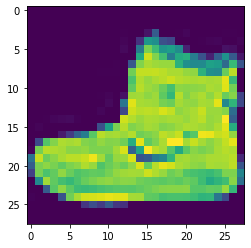

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [7]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
testing_images = testing_images.reshape(10000, 28, 28, 1)
testing_images=testing_images/255.0

In [18]:
model = keras.models.Sequential([ tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(256,activation="relu"),
                                  tf.keras.layers.Dense(256,activation="relu"),
                                  tf.keras.layers.Dense(10,activation='softmax')
                                  ])

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [15]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4890 - accuracy: 0.8207
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3434 - accuracy: 0.8733
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2993 - accuracy: 0.8885
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2755 - accuracy: 0.8962
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2544 - accuracy: 0.9055


In [16]:
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2598 - accuracy: 0.9051


[0.2598358988761902, 0.9050999879837036]

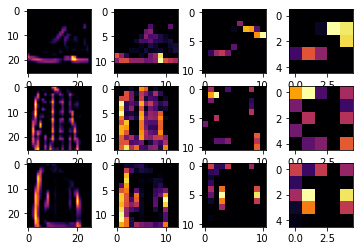

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)